In [149]:
#reading all liberaries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# importing ploting libraries
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn import datasets
%matplotlib inline

In [150]:
#loading breast cancer dataset through sklearn
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()

In [151]:
breast_data = breast.data

In [152]:
breast_data.shape

(569, 30)

In [153]:
breast_labels = breast.target

In [154]:
breast_labels.shape

(569,)

In [155]:
labels = np.reshape(breast_labels,(569,1))

In [156]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape

(569, 31)

In [157]:
breast_dataset = pd.DataFrame(final_breast_data)

In [158]:
features = breast.feature_names

In [159]:
features #features of dataset

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [160]:
features_labels = np.append(features,'label')

In [161]:
breast_dataset.columns = features_labels

In [162]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [163]:
# replacing benign and malignant with 0,1
breast_dataset['label'].replace(0, 'Benign',inplace=True) 
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [164]:
breast_dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign


In [165]:
X=breast_dataset.drop('label',axis=1) #input variable/independant variables
y=breast_dataset['label'] #independant variables

In [166]:
X_std = StandardScaler().fit_transform(X) #transforming inputdata

In [167]:
#loading data for decision tree
from sklearn.metrics import confusion_matrix
from sklearn import tree 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [168]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Before applying PCA::

In [169]:
#decision tree before applying pca
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier()

In [170]:
y_pred_DT = model.predict(X_test) #predecting values

In [171]:
cm_DT= confusion_matrix(y_test, y_pred_DT)
cm_DT #confusion matrix of decision tree

array([[45,  2],
       [ 9, 58]], dtype=int64)

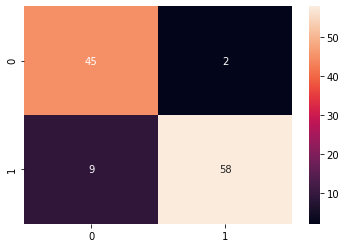

In [172]:
sns.heatmap(cm_DT, annot=True)
plt.show()

In [173]:
#type1 and type2 errors is low 

In [174]:
classification=classification_report(y_test,y_pred_DT)
print(classification) #classification report

              precision    recall  f1-score   support

      Benign       0.83      0.96      0.89        47
   Malignant       0.97      0.87      0.91        67

    accuracy                           0.90       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



In [175]:
ac = accuracy_score(y_test, y_pred_DT)
print("Accuracy Score:", ac) #accuracy of model

Accuracy Score: 0.9035087719298246


91% accuracy for decision tree algo without applying PCA.

Decision tree with PCA

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) #splitting dataset

In [140]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [141]:
#importing PCA
from sklearn.decomposition import PCA
pca = PCA()
X_train_2 = pca.fit_transform(X_train)
X_test_2 = pca.transform(X_test)

In [142]:
explained_variance = pca.explained_variance_ratio_  
explained_variance #explianed varience 

array([4.34307675e-01, 1.97401146e-01, 9.35177070e-02, 6.67766058e-02,
       5.64245165e-02, 4.07161938e-02, 2.14925398e-02, 1.51269268e-02,
       1.39676264e-02, 1.16009156e-02, 1.01216224e-02, 8.97175303e-03,
       7.71439121e-03, 5.55309643e-03, 3.11522438e-03, 2.64580181e-03,
       1.99647487e-03, 1.70618303e-03, 1.50414589e-03, 1.06143766e-03,
       9.94608221e-04, 8.78454935e-04, 7.24281209e-04, 5.81085817e-04,
       5.46645369e-04, 2.61499457e-04, 2.16152203e-04, 4.62504070e-05,
       2.53207432e-05, 3.71910834e-06])

In [143]:
#importing decision tree
from sklearn import tree
model2=tree.DecisionTreeClassifier()
model2.fit(X_train_2,y_train)


DecisionTreeClassifier()

In [144]:
y_pred_DT_2 = model2.predict(X_test_2) #predicting values

In [145]:
from sklearn.metrics import confusion_matrix
cm_PCA= confusion_matrix(y_test, y_pred_DT_2) #confusion matrix

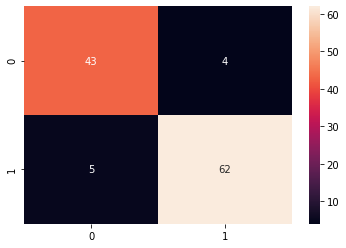

In [146]:
sns.heatmap(cm_PCA, annot=True) 
plt.show()

In [147]:
classification_2=classification_report(y_test,y_pred_DT_2)
print(classification_2)  #classificaion

              precision    recall  f1-score   support

      Benign       0.90      0.91      0.91        47
   Malignant       0.94      0.93      0.93        67

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



In [148]:
ac_PCA = accuracy_score(y_test, y_pred_DT_2)
print("Accuracy Score:", ac_PCA)  #Accuracy score

Accuracy Score: 0.9210526315789473


92% of accuracy of decision tree with pca